# Modelling a Disease 

## Part 1: SIR

In a population of specified size, we have a certain number of people who are susceptible to a disease. 
If, say, one person was infected and began spreading the disease, the number of infected people rises, while the number of susceptible people falls (as more susceptible people become infected). During the outbreak, there will also be a number of recovered people, who once were infected, but have now overcome the disease and have gained an immunity, setting them aside from the other susceptible people. 

We can predict the dynamics of this relationship with a susceptible/Infected/Recovered (SIR) model. 


Firstly, let's look at the susceptible group: <br>
    $$S_{n+1} = S_{n}+(\frac{-b\times S_{n}\times I_{n}}{N}) dt$$<br>
    
Where 
* $N$ = total size of population 
* $S$ = number of susceptible people in population size N
* $I$ = number of infected people
* $b$ = rate at which the infection transfers from infected to susceptible per day
* $dt$ = the time-step


You can see from the equation that $b$ is negative, therefore once $I$ is not zero, there will always be fewer susceptible people after each time-step. This makes sense since during a disease outbreak, there won't be any rise in susceptible people (births of new people are not accounted for in this model, but can be useful especially for long-term disease analysis). 
<br>

The other two equations will be for Infected and Recovered people:

<br>
    $$I_{n+1} = I_{n}+(\frac{b\times S_{n}\times I_{n}}{N}  - g \times  I_{n}) dt$$ <br>
    $$R_{n+1} = R_{n}+(g\times I_{n}) dt$$ <br>
    
Where
* $R$ = the number of recovered people 
* $g$ = the daily rate of recovery 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 


Firstly we need to define out variables and constants. 

* Let's set the rate of infection to 1 per infected person per day.  
* The recovery rate per day should be 0.25
* Make the total population size 10,000 people
* Introduce one infected person into the population (the simulation will start with 1 Infected, 9999 susceptible, and 0 Recovered)

You will need to create some start time and an end time for the simulation, as well as a time-step. 

Great, so now we have defined the initial conditions for our model! Below, create four empty lists for time, susceptible, Infected, and Recovered. 

In [8]:
tL = []  
sucL = []
infL = []
recL = []

As we run our function across all values of t, these lists will be filled with the corresponding population numbers.

Next, under the condition that t is less than your end-time, model your three equations and plot S, I, and R versus time to visualise the outbreak. 

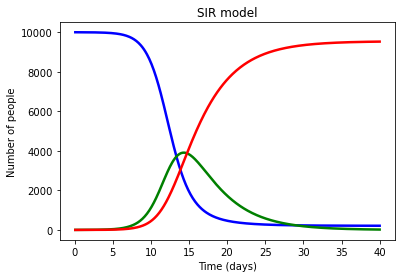

In [9]:
b= 1 # amount of people 1 infected infects per dt
g= 0.25 # recovery rate
N= 10000 # pop size 

max_time = 40
dt = 0.1
t = 0

S = 9999
I = 1
R = 0

tL = []  
sucL = []
infL = []
recL = []

while t <= max_time:

    t = t + dt
         
    S = S+(-b * S * I / N)*dt
    I = I+(b * S * I / N - g * I)*dt
    R = R+(g * I)*dt
   
    tL.append(t)
    sucL.append(S) # blue suceptable
    infL.append(I) # green infected
    recL.append(R)# red recovered 


plt.plot(tL, sucL, 'b', tL,infL, 'g', tL, recL, 'r', lw = 2.5, linestyle='solid', )

plt.title('SIR model')
plt.xlabel('Time (days)')
plt.ylabel("Number of people")

plt.show()

## Part 2: SEIR

Next we introduce the "Exposed" populations as another factor to make our model more realistic. 
The equations for susceptible and Recovered stays the same, but we include a new equation for Exposed people ($E$) and make a small adjustment to the Infected equation. 

$$S_{n+1} = S_{n}+(\frac{-b\times S_{n}\times I_{n}}{N}) dt$$<br>
$$ {\color{red} {E_{n+1} = \frac{-b\times S_{n}\times I_{n}}{N}-d\times E_n}}$$ <br>
$$I_{n+1} = I_{n}+({\color{red} {d\times E_n}}  - g \times  I_{n}) dt$$ <br>
$$R_{n+1} = R_{n}+(g\times I_{n}) dt$$ <br>

Where
* d = time (in days) between exposure to disease and first symptoms. 

Note that $E$ has effectively just replaced $I$ here, with the equation being similar but with a different constant. The $I$ equation still takes into account how many people are susceptible, as before, but can do so now just by including the $E$ parameter in the equation.

To make our simulation realistic, let's increase our total population to one million people, and introduce one Exposed person:

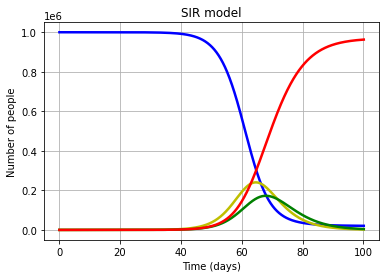

In [10]:
b= 1 # amount of people 1 infected infects per dt
g= 0.25 # recovery rate
N= 1000000 # pop size 
d = 0.2 # inc. period

max_time = 100
dt = 0.1
t = 0

S = 999999
E = 1
I = 0
R = 0

tL = []  
sucL = []
expL = []
infL = []
recL = []

while t <= max_time:

    t = t + dt
         
    S = S+(-b * S * I / N)*dt
    E = E+(b * S * I / N - d * E)*dt
    I = I+(d*E - g * I)*dt
    R = R+(g * I)*dt
   
    tL.append(t)
    sucL.append(S) # blue suceptable
    expL.append(E) # yellow exposed 
    infL.append(I) # green infected
    recL.append(R)# red recovered 


plt.plot(tL, sucL, 'b', tL, expL, "y", tL,infL, 'g', tL, recL, 'r', lw = 2.5, linestyle='solid', )

plt.title('SIR model')
plt.xlabel('Time (days)')
plt.ylabel("Number of people")
plt.grid()
plt.show()

## Part 3: impact of a lockdown.

It has been proposed that enforcing a lockdown will lower the infection rate of our disease. 

$r$ = the total number of people an infected person infects ($r = \frac{b}{  g}$)

Since $b = r \times g$ , we can write a function to define a change in r, which in turn will alter our value for b. Remember, b is the rate at which the infection transfers from infected to susceptible per day, meaning a lower b will decrease the rate of infection. 

In our scenario we have a total hospital capacity of 200,000 people. If more than 200,000 are infected at a given time, they won't be able to get treatment and our disease will become far more deadly. 
We want to make a change to our value of $r$ so that $b$ becomes lower, lowering the infection rate. If we can sufficiently lower $b$, the infection curve will flatten, and the hospitals will not be overcrowded during the peak-times of the outbreak.

Define a function that makes $r = 6$ if there is no lockdown, but $r = 4$ during a lockdown. Set the lockdown to begin at day 30 and end at day 100. 

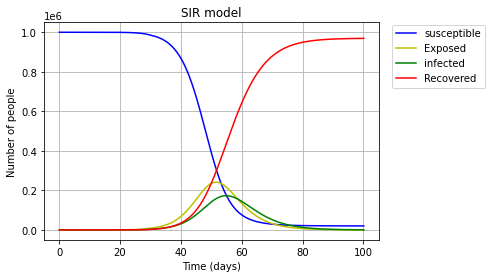

In [11]:
g= 0.25 # recovery rate
N= 1000000 # pop size 
d = 0.2 # inc. period

max_time = 100
dt = 0.1
t = 0

S = 999999
E = 1
I = 0
R = 0

L1= 30 # lockdown day
L2 = 100  #easing 

def r(t):
    return 4 if L1<t<L2 else 6
def b(t):
    return r(t) * g



tL = []  
sucL = []
expL = []
infL = []
recL = []

while t <= max_time:

    t = t + dt
         
    S = S+(-b(t) * S * I / N)*dt
    E = E+(b(t) * S * I / N - d * E)*dt
    I = I+(d*E - g * I)*dt
    R = R+(g * I)*dt
   
    tL.append(t)
    sucL.append(S) # blue suceptable
    expL.append(E) # yellow exposed 
    infL.append(I) # green infected
    recL.append(R)# red recovered 


plt.plot(tL, sucL, 'b', label="susceptible")
plt.plot(tL, expL, "y", label="Exposed")
plt.plot(tL,infL, 'g',label="infected")
plt.plot(tL, recL, 'r', label="Recovered")

plt.title('SIR model')
plt.xlabel('Time (days)')
plt.ylabel("Number of people")
plt.legend(loc=(1.04,0.7))
plt.grid()
plt.show()

As you can see, the curve has successfully been flattened! 

Finally, let's see what happens if a lockdown is lifted too quickly. 
Set the end of the lockdown to occur on day 45

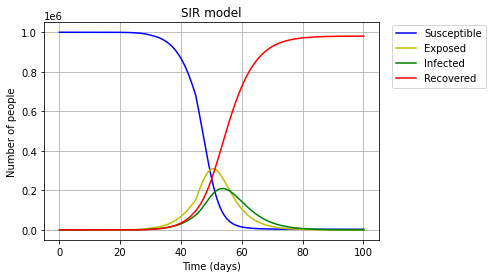

In [22]:
g= 0.25 # recovery rate
N= 1000000 # pop size 
d = 0.2 # inc. period

max_time = 100
dt = 0.1
t = 0

S = 999999
E = 1
I = 0
R = 0

L1= 30 # lockdown day
L2 = 45 #easing 

def r(t):
    return 4 if L1<t<L2 else 6
def b(t):
    return r(t) * g



tL = []  
sucL = []
expL = []
infL = []
recL = []

while t <= max_time:

    t = t + dt
         
    S = S+(-b(t) * S * I / N)*dt
    E = E+(b(t) * S * I / N - d * E)*dt
    I = I+(d*E - g * I)*dt
    R = R+(g * I)*dt
   
    tL.append(t)
    sucL.append(S) # blue suceptable
    expL.append(E) # yellow exposed 
    infL.append(I)# green infected
    recL.append(R)# red recovered 


plt.plot(tL, sucL, 'b', label="Susceptible")
plt.plot(tL, expL, "y", label="Exposed")
plt.plot(tL,infL, 'g',label="Infected")
plt.plot(tL, recL, 'r', label="Recovered")

plt.title('SIR model')
plt.xlabel('Time (days)')
plt.ylabel("Number of people")
plt.legend(loc=(1.04,0.7))
plt.grid()
plt.show()

## Part 6: Analysing the Model 

We want to know at which day in particular the number of infected will peak. 
One way we can do this is by using list.index() to find which entry in the list has the maximum value. Remember that because your time step (dt) is 0.1, there are **10 values per day** in your list. 

Search your infected list to find which day we have a maximum number of infected people. 

In [32]:
infL.index(max(infL))*dt
    


53.6

On which day is the number of recovered highest? <br>
What percentage of the population are NOT recovered by this day?

In [53]:
print(recL.index(max(recL))*dt)
print(((N-max(recL))/N)*100,"%")

100.0
1.9540422361256673 %


Suppose we ran exactly the same simulation as above, but thanks to mask-wearing and social distancing, the value of $r$ becomes 2 rather than 4 during the lockdown, and the lockdown lasts 200 days (set your simulation and max lockdown dates to 200) 

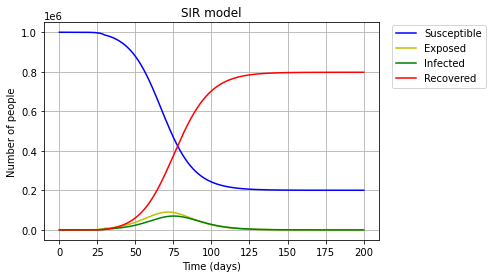

In [104]:
g= 0.25 # recovery rate
N= 1000000 # pop size 
d = 0.2 # inc. period

max_time = 200
dt = 0.1
t = 0

S = 999999
E = 1
I = 0
R = 0

L1= 30 # lockdown day
L2 = 200 #easing 

def r(t):
    return 2 if L1<t<L2 else 6
def b(t):
    return r(t) * g



tL = []  
sucL = []
expL = []
infL = []
recL = []

while t <= max_time:

    t = t + dt
         
    S = S+(-b(t) * S * I / N)*dt
    E = E+(b(t) * S * I / N - d * E)*dt
    I = I+(d*E - g * I)*dt
    R = R+(g * I)*dt
   
    tL.append(t)
    sucL.append(S) # blue suceptable
    expL.append(E) # yellow exposed 
    infL.append(I)# green infected
    recL.append(R)# red recovered 


plt.plot(tL, sucL, 'b', label="Susceptible")
plt.plot(tL, expL, "y", label="Exposed")
plt.plot(tL,infL, 'g',label="Infected")
plt.plot(tL, recL, 'r', label="Recovered")

plt.title('SIR model')
plt.xlabel('Time (days)')
plt.ylabel("Number of people")
plt.legend(loc=(1.04,0.7))
plt.grid()
plt.show()

On which day are there the fewest susecptable people? <br>
Why do you think this number has stopped declining? <br>
What percentage of the population is still sucestable at the end of the lockdown? <br> 

In [115]:
print(sucL.index(min(sucL))*dt)
print("There are no more infected people left to expose the disease to susceptible people")
print(((min(sucL))/N)*100,"%")

200.0
There are no more infected people left to expose the disease to susceptible people
20.058258065148635 %


Models like these can be made more and more complex to better fit reality and make more accurate predictions. Name 3 more factors that our model could take into account to make it more realistic.


In [127]:
print("Death rates, second-wave infection, separate Infected in hospital & Infected asympomatic," )
print( "vaccine implementation, population growth rate (new Sueptables)" )

Death rates, second-wave infection, separate Infected in hospital & Infected asympomatic,
vaccine implementation, population growth rate (new Sueptables)
